# Zoo Animal Classification using Naive Bayes
<hr>

Here we would be looking at yet another Classifier called Naive Bayes. We would be using the Zoo dataset which is a simple database containing 17 Boolean-valued attributes. The "type" attribute appears to be the class attribute. Here is a breakdown of which animals are in which type:

Class# <-> Set of animals: 
1. (41) aardvark, antelope, bear, boar, buffalo, calf, cavy, cheetah, deer, dolphin, elephant, fruitbat, giraffe, girl, goat, gorilla, hamster, hare, leopard, lion, lynx, mink, mole, mongoose, opossum, oryx, platypus, polecat, pony, porpoise, puma, pussycat, raccoon, reindeer, seal, sealion, squirrel, vampire, vole, wallaby,wolf 
2. (20) chicken, crow, dove, duck, flamingo, gull, hawk, kiwi, lark, ostrich, parakeet, penguin, pheasant, rhea, skimmer, skua, sparrow, swan, vulture, wren 
3. (5) pitviper, seasnake, slowworm, tortoise, tuatara 
4. (13) bass, carp, catfish, chub, dogfish, haddock, herring, pike, piranha, seahorse, sole, stingray, tuna 
5. (4) frog, frog, newt, toad 
6. (8) flea, gnat, honeybee, housefly, ladybird, moth, termite, wasp 
7. (10) clam, crab, crayfish, lobster, octopus, scorpion, seawasp, slug, starfish, worm

The dataset can be downloaded from https://archive.ics.uci.edu/ml/datasets/Zoo

Place the saved `zoo.data` in the current directory as your code. We begin by importing the required modules:

In [4]:
import os
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation, metrics
from sklearn.naive_bayes import BernoulliNB
from time import time
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score , classification_report
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report

We load the data in a Pandas dataframe as always and specify our column names.

In [6]:
# read .csv from provided dataset
csv_filename="zoo.data"

# df=pd.read_csv(csv_filename,index_col=0)
df=pd.read_csv(csv_filename, 
              names=["Animal", "Hair" , "Feathers" , "Eggs" , "Milk" , "Airborne",
                     "Aquatic" , "Predator" , "Toothed" , "Backbone", "Breathes" , "Venomous",
                     "Fins", "Legs", "Tail", "Domestic", "Catsize", "Type" ])

We'll have a look at our dataset:

In [7]:
df.head()

,Animal,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Toothed,Backbone,Breathes,Venomous,Fins,Legs,Tail,Domestic,Catsize,Type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [8]:
df.tail()

,Animal,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Toothed,Backbone,Breathes,Venomous,Fins,Legs,Tail,Domestic,Catsize,Type
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
100,wren,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2


In [9]:
df['Animal'].unique()

array(['aardvark', 'antelope', 'bass', 'bear', 'boar', 'buffalo', 'calf',
       'carp', 'catfish', 'cavy', 'cheetah', 'chicken', 'chub', 'clam',
       'crab', 'crayfish', 'crow', 'deer', 'dogfish', 'dolphin', 'dove',
       'duck', 'elephant', 'flamingo', 'flea', 'frog', 'fruitbat',
       'giraffe', 'girl', 'gnat', 'goat', 'gorilla', 'gull', 'haddock',
       'hamster', 'hare', 'hawk', 'herring', 'honeybee', 'housefly',
       'kiwi', 'ladybird', 'lark', 'leopard', 'lion', 'lobster', 'lynx',
       'mink', 'mole', 'mongoose', 'moth', 'newt', 'octopus', 'opossum',
       'oryx', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'pike',
       'piranha', 'pitviper', 'platypus', 'polecat', 'pony', 'porpoise',
       'puma', 'pussycat', 'raccoon', 'reindeer', 'rhea', 'scorpion',
       'seahorse', 'seal', 'sealion', 'seasnake', 'seawasp', 'skimmer',
       'skua', 'slowworm', 'slug', 'sole', 'sparrow', 'squirrel',
       'starfish', 'stingray', 'swan', 'termite', 'toad', 'tortoise',
       

Now this data contains textual data. The values are in String not in Integer or Float as we would like for our classifier. So we'll use LabelEncoder to transform the data:

Next we convert the Legs column in a binarized form using the get_dummies method.

In [10]:
#Convert animal labels to numbers
le_animals = preprocessing.LabelEncoder()
df['animals'] = le_animals.fit_transform(df.Animal)
 
#Get binarized Legs columns
df['Legs'] = pd.get_dummies(df.Legs)
#types = pd.get_dummies(df.Type)

Our data now looks like:

In [11]:
df.head()

,Animal,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Toothed,Backbone,Breathes,Venomous,Fins,Legs,Tail,Domestic,Catsize,Type,animals
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,0,0,0,1,1,0
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,1,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,1,1,0,0,4,2
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,0,0,0,1,1,3
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,0,1,0,1,1,4


In [12]:
df['Type'].unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

Our class values range from 1 to 7 denotin specific Animal type.

We specify our features and target variable

In [18]:
features=(list(df.columns[1:]))

In [19]:
features

['Hair',
 'Feathers',
 'Eggs',
 'Milk',
 'Airborne',
 'Aquatic',
 'Predator',
 'Toothed',
 'Backbone',
 'Breathes',
 'Venomous',
 'Fins',
 'Legs',
 'Tail',
 'Domestic',
 'Catsize',
 'Type',
 'animals']

In [20]:
features.remove('Type')

In [21]:
X = df[features]
y = df['Type']

In [22]:
X.head()

,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Toothed,Backbone,Breathes,Venomous,Fins,Legs,Tail,Domestic,Catsize,animals
0,1,0,0,1,0,0,1,1,1,1,0,0,0,0,0,1,0
1,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,1,1,0,0,2
3,1,0,0,1,0,0,1,1,1,1,0,0,0,0,0,1,3
4,1,0,0,1,0,0,1,1,1,1,0,0,0,1,0,1,4


As usual, we split our dataset to 60% training and 40% testing

In [25]:
# split dataset to 60% training and 40% testing
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4, random_state=0)

In [27]:
X_train.shape, y_train.shape

((60, 17), (60,))

### Finding Feature importances with forests of trees

This examples shows the use of forests of trees to evaluate the importance of features on an artificial classification task. The red bars are the feature importances of the forest, along with their inter-trees variability.

Feature ranking:
1. feature 3 - Milk (0.138606) 
2. feature 1 - Feathers (0.138508) 
3. feature 2 - Eggs (0.113904) 
4. feature 7 - Toothed (0.083274) 
5. feature 0 - Hair (0.083251) 
6. feature 8 - Backbone (0.082373) 
7. feature 9 - Breathes (0.076449) 
8. feature 11 - Fins (0.063457) 
9. feature 13 - Tail (0.050104) 
10. feature 12 - Legs (0.048997) 
11. feature 5 - Aquatic (0.035794) 
12. feature 4 - Airborne (0.035151) 
13. feature 16 - animals (0.016738) 
14. feature 15 - Catsize (0.011835) 
15. feature 6 - Predator (0.011787) 
16. feature 10 - Venomous (0.009257) 
17. feature 14 - Domestic (0.000515) 


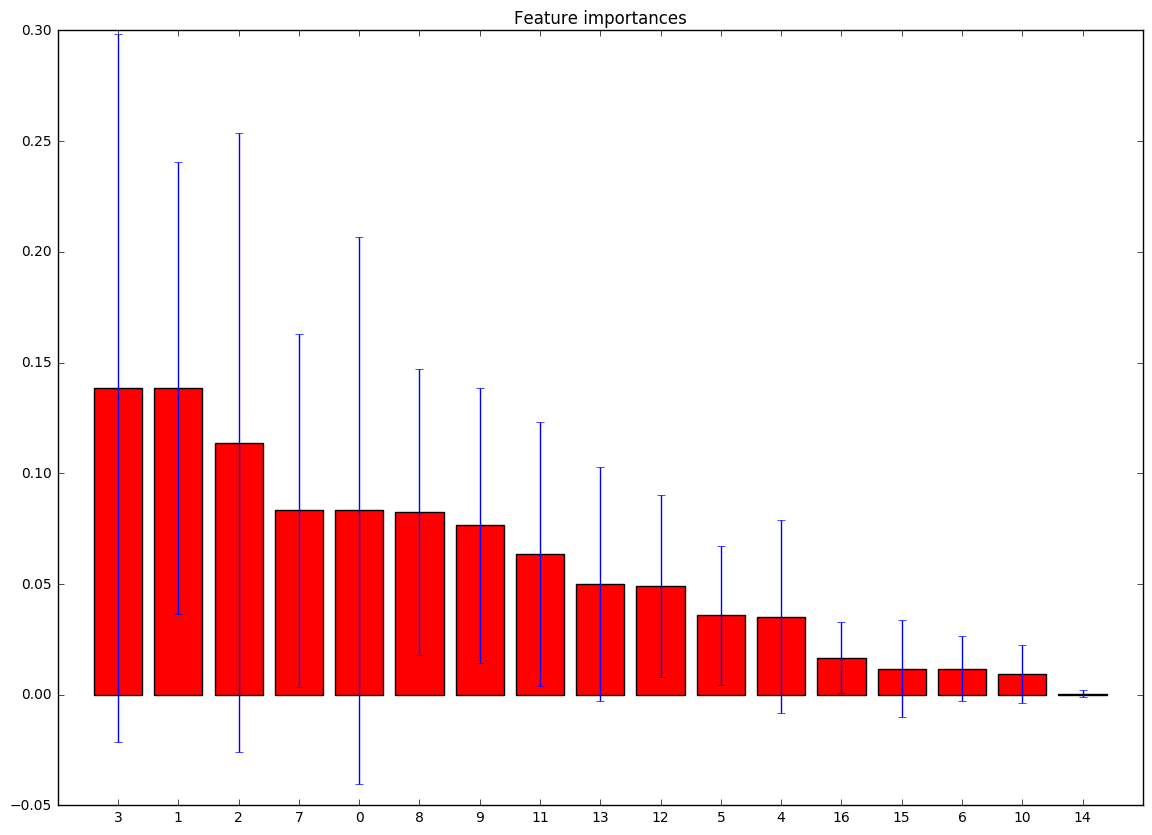

In [28]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d - %s (%f) " % (f + 1, indices[f], features[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [29]:
importances[indices[:5]]

array([ 0.13860564,  0.13850845,  0.11390376,  0.083274  ,  0.08325078])

In [30]:
for f in range(5):
    print("%d. feature %d - %s (%f)" % (f + 1, indices[f], features[indices[f]] ,importances[indices[f]]))

1. feature 3 - Milk (0.138606)
2. feature 1 - Feathers (0.138508)
3. feature 2 - Eggs (0.113904)
4. feature 7 - Toothed (0.083274)
5. feature 0 - Hair (0.083251)


In [31]:
best_features = []
for i in indices[:5]:
    best_features.append(features[i])

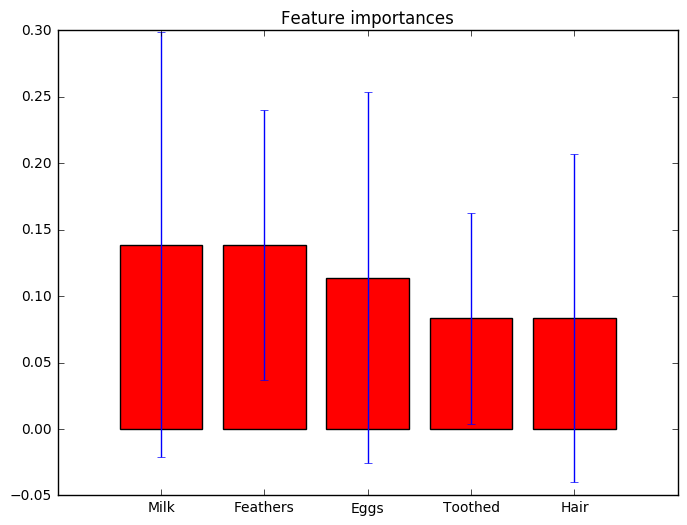

In [32]:
# Plot the top 5 feature importances of the forest
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title("Feature importances")
plt.bar(range(5), importances[indices][:5], 
       color="r",  yerr=std[indices][:5], align="center")
plt.xticks(range(5), best_features)
plt.xlim([-1, 5])
plt.show()

<hr>
# Naive Bayes


Naive Bayes algorithm is a simple yet powerful algorithm. The naive term comes from the fact that Naive Bayes takes a few shortcuts, which we would take a look over soon, to compute the probabilities for classification. It is flexible enough and can be used on different types of datasets easily and doesn't have constraints like only numerical features should be used. Hence it is a most appropriate for tasks like Text Classification. Naive Bayes works on a probabilistic model that is built upon a naive interpretation of Bayesian statistics. Despite the naive aspect, the method performs very well in a large number of contexts. 

### Bayes' theorem

Approach to learning statistics is roughly divided into two parts : the frequentist
approach and the Bayesian approach.

Most of us have been familiar with the frequentist approach when we first encountered with Statistics. According to frequentist approach, the data is assumed to data come from some distribution and then our aim is to determine what the parameters are for that particular distribution. However, those parameters are assumed to be fixed (perhaps incorrectly). We use our model to
describe the data, and then even test to ensure the data fits our model.

Bayesian statistics instead model how people actually reason when given with some data. We have a set of data and we use that data to update our model about with the probability of how likely something is to occur. In Bayesian statistics, we use the data to describe the model rather than using a model first and confirming it later with data like the frequentist approach.

Bayes' theorem computes the value of P(A|B), which denotes what is the probability of even A occurring, given that B has already occurred. In most cases, B would be an observed event for e.g. it has rained
yesterday, and A would be a prediction like it will rain today. For data mining, B is usually what we refer to as our observed data for training our model and A would be finding out to what class a new data point belongs. We will see how Bayes'
theorem can be used for data mining in the next section.
The equation for Bayes' theorem is given as follows:

<img src = "images/bayes.png">

To understand Naive Bayes better, we would take our Zoo animal classification example, where we are classifying animals according to their type. For simplicity we assume we want to find the probability that an animal with a set of features X1 and X2 is of Type 1 i.e vertebrates.

A, in this context, is the probability that this animal is a vertebrate. We can compute P(A),
called the prior belief directly from a training dataset by computing the percentage
of animals in our dataset that are vertebrates. If our dataset contains 30 vertebrates for
every 100 animals, P(A) is 30/100 or 0.3.

B, in this context, is this animal contains the features 'X1' and 'X2'. Likewise, we can compute P(B)
by computing the percentage of animals in our dataset containing these specific features. If 10
animals in every 100 of our training dataset contain the features 'X1' and 'X2', P(B) is 10/100 or
0.1. Note that we don't care if the animal is vertebrate or not when computing this value.

P(B|A) is the probability that an animal contains the features 'X1' and 'X2' if it is a vertebrate.
It is also easy to compute from our training dataset. We look through our training
set for vertebrate animals and compute the percentage of them that contain the features X1 and X2. Of our 30 vertebrates, if 6 contain the features 'X1' and 'X2', then P(B|A) is calculated as 6/30 or 0.2.

From here, we use Bayes' theorem to compute P(A|B), which is the probability that
a animal containg the particular features 'X1' and 'X2' is a vertebrate. Using the previous equation, we see the
result is 0.6. This indicates that if an animal has the features 'X1' and 'X2' in it, there is a 60
percent chance that it is vertebrate.

Note how we calculated the probability in the preceding example. We used evidence directly
from our training dataset, not from some presumed distribution. In contrast, a
frequentist approach of this would rely on us creating a distribution of the probability of
different features in animals to compute similar equations.

<hr>
### Naive Bayes algorithm

As we found out, the Bayes' theorem equation can be used to compute the
probability that a given sample belongs to a given class. Hence we can use the equation as a classification algorithm.

Using C as a given class and D as a sample data-point in our dataset, we create the elements
necessary for Bayes' theorem and Naive Bayes. Naive Bayes is a
classification algorithm that utilizes Bayes' theorem to compute the probability
that a new data sample belongs to a particular class.

P(C) is the probability of a class, which is computed from the training dataset itself
(as we did with the vertebrate example). We simply compute the percentage of samples
in our training dataset that belong to the given class.

P(D) is the probability of a given data-point. It might get difficult for us to compute this, as the sample can contain many different features, but since it is a constant across all classes and we don't need to compute it at all. We will see
later how to work around this issue.

P(D|C) is the probability of the data sample D belonging to the class C. This could also be difficult to compute due to the different features of D. However, this is where the naive part of the Naive Bayes algorithm comes into picture. Naive Bayes naively assume that each feature is independent of each other. Rather than computing the full probability of
P(D|C), we compute the probability of each feature D1, D2, D3, … and so on. Then,
we multiply them together:
P(D|C) = P(D1|C) x P(D2|C).... x P(Dn|C) as if they were all independent from each other. 
Each of these values is relatively easy to compute; we simply compute the percentage of times it is equal in our sample dataset.

In contrast, if we wanted to perform a non-Naive Bayes version for this part, we would
need to compute the correlations between different features for each class. Such
computation is too complex and hence infeasible, without vast amounts of data or sufficient language analysis models.
From here, the algorithm is simple. We compute P(C|D) for each possible
class, ignoring the P(D) term. Then we choose the class with the highest probability.
As the P(D) term is constant across each of the classes, ignoring it has no impact on
the final prediction.

#### How it works

As an example, suppose we have the following (binary) feature values from a
sample in our dataset: [0, 0, 0, 1].
Our training dataset contains two classes with 25 percent (1 out of 4) belonging to the class 1 and 75 percent (3 out of 4) of samples belonging to the class 0. The probabilities of the feature values for each class are as follows:

For Class 0: [0.3, 0.4, 0.4, 0.7]

For Class 1: [0.7, 0.3, 0.4, 0.9]

Interpretation of these values would be: for feature 1, it is a 1 in 30 percent of cases for class 0.

We can now compute the probability that this sample should belong to the class 0.
P(C=0) = 0.75 which is the probability that the class is 0.
P(D) isn't needed for the Naive Bayes algorithm. Let's take a look at the calculation:
P(D|C=0) = P(D1|C=0) x P(D2|C=0) x P(D3|C=0) x P(D4|C=0)
= 0.3 x 0.6 x 0.6 x 0.7
= 0.0756

The second and third values are 0.6, because the value of that feature
in the sample was 0. The listed probabilities are for values of 1 for each
feature. Therefore, the probability of a 0 is its inverse: P(0) = 1 – P(1).

Now, we can compute the probability of the data sample belonging to this class.
An important point to note is that we haven't computed P(D), so this isn't a real
probability. However, it is good enough to compare against the same value for
the probability of the class 1. Let's take a look at the calculation:

P(C=0|D) = P(C=0) P(D|C=0)
= 0.75 * 0.0756
= 0.0567

Now, we compute the same values for the class 1:

P(C=1) = 0.25

P(D) isn't needed for naive Bayes. Let's take a look at the calculation:

P(D|C=1) = P(D1|C=1) x P(D2|C=1) x P(D3|C=1) x P(D4|C=1)
= 0.7 x 0.7 x 0.6 x 0.9
= 0.2646

P(C=1|D) = P(C=1)P(D|C=1)
= 0.25 * 0.2646
= 0.06615

The data point should be classified as belonging to the class 1. You may have
guessed this while going through the equations anyway; however, you may have
been a bit surprised that the final decision was so close. After all, the probabilities
in computing P(D|C) were much, much higher for the class 1. This is because we
introduced a prior belief that most samples generally belong to the class 0.

If the classes had been equal sizes, the resulting probabilities would be much
different. Try it yourself by changing both P(C=0) and P(C=1) to 0.5 for equal class
sizes and computing the result again.


Now that we understand the theory, implementing Naive Bayes classifier is identical to implementations of other classifiers and very simple:
    
We follow the same steps :

1. Create a NaiveBayesClassifier object. (Here we use the BernoulliNB classifier)
2. We fit our model on our training sets
3. We print the Accuracies calculated on the test sets.

In [34]:
t4=time()
print ("NaiveBayes")
nb = BernoulliNB()
clf_nb=nb.fit(X_train,y_train)
print ("Acurracy: ", clf_nb.score(X_test,y_test))
t5=time()
print ("time elapsed: ", t5-t4)

NaiveBayes
Acurracy:  0.878048780488
time elapsed:  0.5022096633911133


Thus the Accuracy is found to be 87% which is quite good for such limited data. However this accuracy might not be a perfect measure of our model efficiency. Hence we use Cross Validation :

## Cross-validation for Naive Bayes

In [37]:
tt4=time()
print ("cross result========")
scores = cross_validation.cross_val_score(nb, X,y, cv=3)
print (scores)
print (scores.mean())
tt5=time()
print ("time elapsed: ", tt5-tt4)

cross result========
[ 0.97297297  0.94117647  0.9       ]
0.93804981452
time elapsed:  0.035601139068603516


Thus the overall accuracy using Cross Validation is 93 % which shows our Naive Bayes model is effective in classifying the Animal data.

<hr>
### Summary
                                                                               
In this chapter, we looked at zoo animal clasification task which required us to preprocess that data before we actually train it using the Naive Bayes Classifier. We used a Naive Bayes classifier to perform our classification. This is built
upon the Bayes' theorem that uses prior data to update the model, unlike the frequentist
method that often starts with the model first. This allows the model to be flexible and and update new data, and incorporate a prior belief. In addition, the naive part allows to easily compute the probabilities without dealing with complex correlations
between features (we used the animal features like milk, feathers, hair, eggs etc.). You can find that most text-based tasks, Naive Bayes can work pretty well. As another advantage, the Naive Bayes classifier doesn't have any parameters that need to
be set (although there are some if you wish to do some tinkering). I suggest you take up any dataset and try to work around these parameters by the implementing the Naives Bayes algorithm. With Scikit-Learn, it should be pretty simple and fun too.
___